# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [54]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [55]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_length']=df['title'].str.len()
df

,star_rating,title,content_rating,genre,duration,actors_list,title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12
...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",7
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",27
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",47
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",11


In [60]:
# Calcula media, mediana y moda de la columna 'title_length'
media = df['title_length'].mean()
mediana = df['title_length'].median()
moda = df['title_length'].mode()

print (f'La media es {np.round(media)}, la mediana es {mediana} y la moda es {moda}')




La media es 15.0, la mediana es 14.0 y la moda es 0    12
Name: title_length, dtype: int64


In [67]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
#range_ = df['valores'].max() - df['valores'].min()
rango = df['title_length'].max() - df['title_length'].min()
varianza = df['title_length'].var()
desviacion_estandar = df['title_length'].std()

print(f'El rango es {rango}, la varianza es {np.round(varianza)} y la desviación estándar es {np.round(desviacion_estandar)}')


El rango es 67, la varianza es 72.0 y la desviación estándar es 8.0


In [ ]:
# Calcula asimetría y curtosis de la columna 'title_length'

asimetria = df['title_length'].skew()
curtosis = df['title_length'].kurt()

print (f'La asimetría es {np.round(asimetria)} y la curtosis es {np.round(curtosis)}')

if curtosis>0:
    print ("Ademas, la dristribución es leptocúrtica debido a que tenemos una gran variedad de casos muy alejados de la media.")

La asimetría es 2.0 y la curtosis es 4.0
Ademas, la dristribución es leptocúrtica debido a que tenemos una gran variedad de casos muy alejados de la media


In [85]:
# Imprime el título más corto y el título más largo según su longitud
corto = df['title_length'].min()
largo = df['title_length'].max()

titulocorto =df['title'][df['title_length'].argmin()]
titulolargo = df['title'][df['title_length'].argmax()]

print(f'El titulo más corto es "{titulocorto}" que tiene {corto} caracteres y el titulo más largo es "{titulolargo}" que tiene {largo} caracteres')

El titulo más corto es "M" que tiene 1 caracteres y el titulo más largo es "Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb" que tiene 68 caracteres


<Axes: >

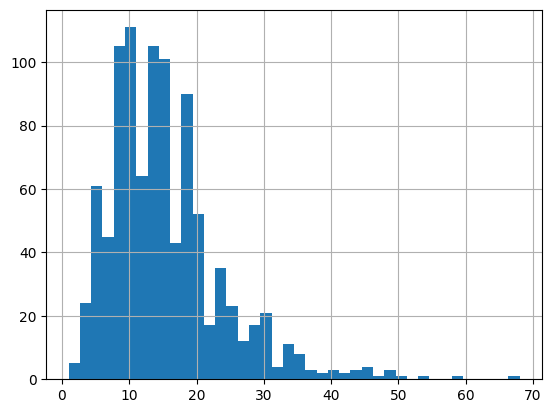

In [92]:
# grafica tus resultados

df['title_length'].hist(bins=40)


---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [118]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
lista = df['title_length'].head(5).tolist() 
print(lista)

[24, 13, 22, 15, 12]


In [123]:
# Calcula la media de los 5 valores
import numpy as np
media = np.mean(lista)
print(media)

17.2


In [124]:
# Calcula las diferencias al cuadrado con respecto a la media
import pandas as pd 

serie =pd.Series(lista)

diferencias_al_cuadrado = (serie - media)**2

diferencias_al_cuadrado


0    46.24
1    17.64
2    23.04
3     4.84
4    27.04
dtype: float64

In [128]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
import numpy as np
varianza = np.mean(diferencias_al_cuadrado)
desviacion = np.sqrt(varianza)
print (varianza)
print(desviacion)

23.76
4.874423042781577
